<a href="https://colab.research.google.com/github/riyapalesha/SPPU_LP3_Lab/blob/main/ML/ML_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months. Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. Perform following steps: 1. Read the dataset. 2. Distinguish the feature and target set and divide the data set into training and test sets. 3. Normalize the train and test data. 4. Initialize and build the model. Identify the points of improvement and implement the same. 5. Print the accuracy score and confusion matrix.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('./datasets/Churn_Modelling.csv')

In [ ]:
df=data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [ ]:
x=df.iloc[:,3:13]
x.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [ ]:
y=df["Exited"]
y.head(1)

0    1
Name: Exited, dtype: int64

In [ ]:
x.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
pipeline=Pipeline([
    ("Categorizer",ColumnTransformer(
        [
            ("GeographyLabelEncoder",OneHotEncoder(categories="auto",drop="first"),[1]),
            ("GenderLabelEncoder",OneHotEncoder(categories="auto",drop="first"),[2])
        ],
    n_jobs=1,remainder="passthrough")),
    ("Normalizer",StandardScaler())
])

In [ ]:
x=pipeline.fit_transform(x)
x

array([[-0.57380915, -1.09598752, -0.57873591, ...,  0.64609167,
         0.97024255,  0.02188649],
       [ 1.74273971, -1.09598752, -0.57873591, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.57380915, -1.09598752, -0.57873591, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-0.57380915, -1.09598752, -0.57873591, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-0.57380915,  0.91241915,  1.72790383, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.57380915, -1.09598752, -0.57873591, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
nn=Sequential()

In [ ]:
nn.add(Dense(6,activation="relu",input_shape=(x_train.shape[1],)))
nn.add(Dropout(rate=0.1))

In [ ]:
nn.add(Dense(6,activation="relu"))
nn.add(Dropout(rate=0.1))

In [ ]:
nn.add(Dense(1,activation="sigmoid"))

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
nn.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
history=nn.fit(x_train,y_train,batch_size=32,epochs=200,validation_split=0.1,verbose=2)

Epoch 1/200
225/225 - 2s - loss: 0.5732 - accuracy: 0.7933 - val_loss: 0.5263 - val_accuracy: 0.7950 - 2s/epoch - 10ms/step
Epoch 2/200
225/225 - 1s - loss: 0.5111 - accuracy: 0.7953 - val_loss: 0.4851 - val_accuracy: 0.7950 - 653ms/epoch - 3ms/step
Epoch 3/200
225/225 - 1s - loss: 0.4800 - accuracy: 0.7951 - val_loss: 0.4595 - val_accuracy: 0.7950 - 652ms/epoch - 3ms/step
Epoch 4/200
225/225 - 1s - loss: 0.4649 - accuracy: 0.7947 - val_loss: 0.4471 - val_accuracy: 0.7950 - 656ms/epoch - 3ms/step
Epoch 5/200
225/225 - 1s - loss: 0.4561 - accuracy: 0.7954 - val_loss: 0.4382 - val_accuracy: 0.7962 - 654ms/epoch - 3ms/step
Epoch 6/200
225/225 - 1s - loss: 0.4474 - accuracy: 0.7974 - val_loss: 0.4317 - val_accuracy: 0.7962 - 671ms/epoch - 3ms/step
Epoch 7/200
225/225 - 1s - loss: 0.4466 - accuracy: 0.7969 - val_loss: 0.4274 - val_accuracy: 0.7975 - 609ms/epoch - 3ms/step
Epoch 8/200
225/225 - 1s - loss: 0.4422 - accuracy: 0.7967 - val_loss: 0.4229 - val_accuracy: 0.8000 - 653ms/epoch - 3ms

Epoch 66/200
225/225 - 1s - loss: 0.3946 - accuracy: 0.8222 - val_loss: 0.3522 - val_accuracy: 0.8450 - 685ms/epoch - 3ms/step
Epoch 67/200
225/225 - 1s - loss: 0.3961 - accuracy: 0.8204 - val_loss: 0.3514 - val_accuracy: 0.8475 - 581ms/epoch - 3ms/step
Epoch 68/200
225/225 - 1s - loss: 0.3994 - accuracy: 0.8196 - val_loss: 0.3521 - val_accuracy: 0.8475 - 573ms/epoch - 3ms/step
Epoch 69/200
225/225 - 1s - loss: 0.3970 - accuracy: 0.8206 - val_loss: 0.3522 - val_accuracy: 0.8450 - 610ms/epoch - 3ms/step
Epoch 70/200
225/225 - 1s - loss: 0.3979 - accuracy: 0.8197 - val_loss: 0.3521 - val_accuracy: 0.8450 - 587ms/epoch - 3ms/step
Epoch 71/200
225/225 - 1s - loss: 0.3976 - accuracy: 0.8203 - val_loss: 0.3526 - val_accuracy: 0.8462 - 624ms/epoch - 3ms/step
Epoch 72/200
225/225 - 1s - loss: 0.3976 - accuracy: 0.8204 - val_loss: 0.3521 - val_accuracy: 0.8487 - 594ms/epoch - 3ms/step
Epoch 73/200
225/225 - 1s - loss: 0.3944 - accuracy: 0.8236 - val_loss: 0.3509 - val_accuracy: 0.8475 - 578ms/e

Epoch 131/200
225/225 - 1s - loss: 0.3881 - accuracy: 0.8231 - val_loss: 0.3487 - val_accuracy: 0.8462 - 635ms/epoch - 3ms/step
Epoch 132/200
225/225 - 1s - loss: 0.3885 - accuracy: 0.8224 - val_loss: 0.3501 - val_accuracy: 0.8450 - 573ms/epoch - 3ms/step
Epoch 133/200
225/225 - 1s - loss: 0.3899 - accuracy: 0.8219 - val_loss: 0.3496 - val_accuracy: 0.8438 - 572ms/epoch - 3ms/step
Epoch 134/200
225/225 - 1s - loss: 0.3896 - accuracy: 0.8210 - val_loss: 0.3486 - val_accuracy: 0.8462 - 560ms/epoch - 2ms/step
Epoch 135/200
225/225 - 1s - loss: 0.3924 - accuracy: 0.8196 - val_loss: 0.3500 - val_accuracy: 0.8450 - 567ms/epoch - 3ms/step
Epoch 136/200
225/225 - 1s - loss: 0.3896 - accuracy: 0.8250 - val_loss: 0.3498 - val_accuracy: 0.8438 - 569ms/epoch - 3ms/step
Epoch 137/200
225/225 - 1s - loss: 0.3852 - accuracy: 0.8225 - val_loss: 0.3504 - val_accuracy: 0.8450 - 564ms/epoch - 3ms/step
Epoch 138/200
225/225 - 1s - loss: 0.3894 - accuracy: 0.8179 - val_loss: 0.3519 - val_accuracy: 0.8450 -

225/225 - 1s - loss: 0.3864 - accuracy: 0.8211 - val_loss: 0.3535 - val_accuracy: 0.8438 - 570ms/epoch - 3ms/step
Epoch 196/200
225/225 - 1s - loss: 0.3844 - accuracy: 0.8218 - val_loss: 0.3502 - val_accuracy: 0.8413 - 557ms/epoch - 2ms/step
Epoch 197/200
225/225 - 1s - loss: 0.3860 - accuracy: 0.8218 - val_loss: 0.3509 - val_accuracy: 0.8425 - 677ms/epoch - 3ms/step
Epoch 198/200
225/225 - 1s - loss: 0.3884 - accuracy: 0.8211 - val_loss: 0.3514 - val_accuracy: 0.8413 - 674ms/epoch - 3ms/step
Epoch 199/200
225/225 - 1s - loss: 0.3829 - accuracy: 0.8242 - val_loss: 0.3499 - val_accuracy: 0.8425 - 604ms/epoch - 3ms/step
Epoch 200/200
225/225 - 1s - loss: 0.3871 - accuracy: 0.8217 - val_loss: 0.3504 - val_accuracy: 0.8438 - 569ms/epoch - 3ms/step


In [ ]:
nn_pred=nn.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
nn_pred=(nn_pred>0.5).astype(int)
nn_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

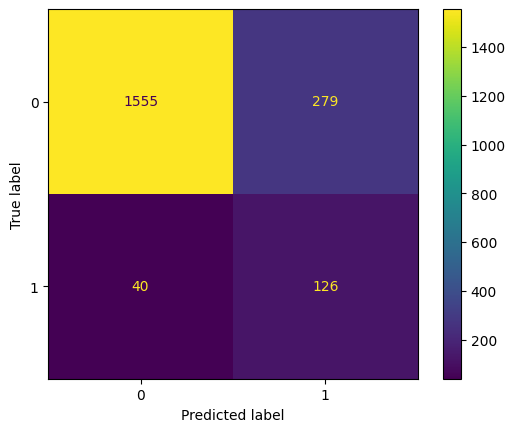

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(nn_pred,y_test)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
cm

array([[1555,  279],
       [  40,  126]], dtype=int64)

In [ ]:
accuracy=(cm[0][0]+cm[1][1])/len(y_test)
accuracy

0.8405